In [1]:
from LTSpice_Simulator import get_Spice_Arrays
import Wavefront_Generation as MC
import Wavefront_Plotting as WP
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
input_values ={
    'L_time':'23',
    'C_time':'23',
    'L_impedance':'100',
}

interface = MC.Full_Cycle(**input_values)

LTSpice_outputs = get_Spice_Arrays(**interface.data_input.SPICE_input_values,Step_size=str(interface.data_input.GCD/8))


Information about this network : 


- The Inductor -
Inductor Inductance Per Length :        1150.0
Inductor Capacitance Per Length :       0.115
Inductor Length :                       1
Inductor Total Inductance :             1150.0
Inductor Total Capacitance :            0.115
Inductor Velocity :                     0.08695652173913043478260869565
Inductor One Way Time Delay :           11.5
Inductor Impedance :                    100

- The Capacitor -
Capacitor Inductance Per Length :       11.5
Capacitor Capacitance Per Length :      11.5
Capacitor Length :                      1
Capacitor Total Inductance :            11.5
Capacitor Total Capacitance :           11.5
Capacitor Velocity :                    0.08695652173913043478260869565
Capacitor One Way Time Delay :          11.5
Capacitor Impedance :                   1

- The Time -
Number Periods :                        1
Simulation Stop Time :                  722.566310325700
Number of Wavefronts :                  2244

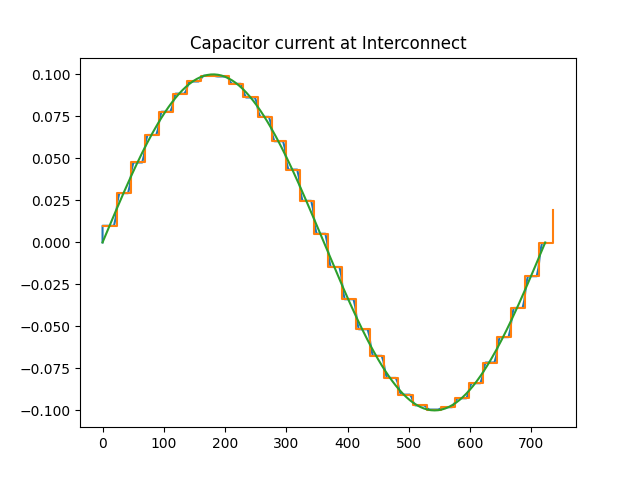

In [3]:
fig,ax = plt.subplots()

ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Tx'])
WP.plot_time_interconnect(interface.data_output_ordered,ax,'Current Capacitor',True)
ax.plot(LTSpice_outputs['time'],LTSpice_outputs['Capacitor_Current_Circuit'])

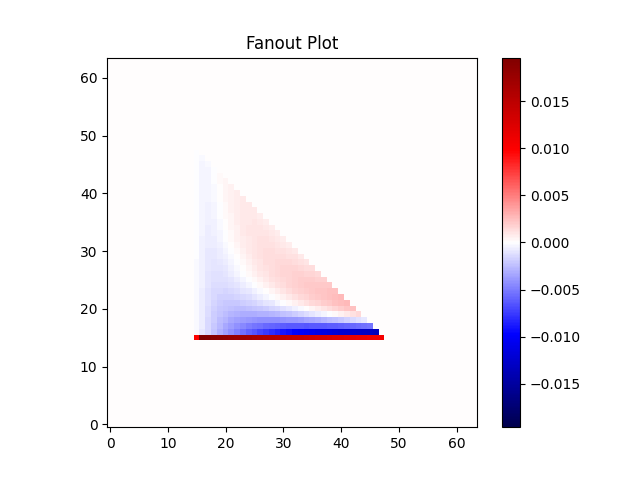

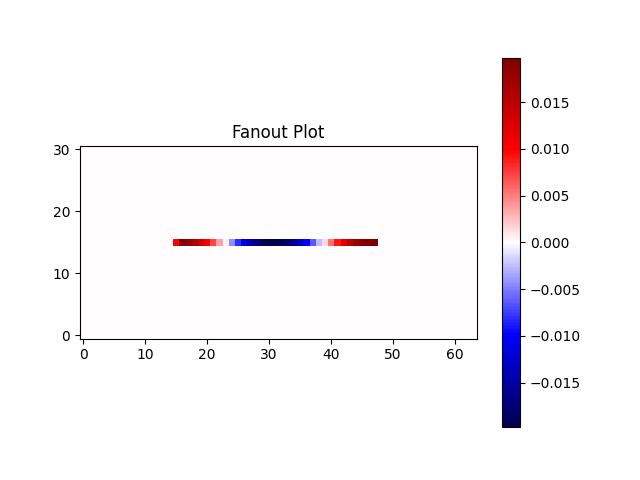

In [4]:
fig_fanout_commutative,ax_fanout_commutative = plt.subplots()
WP.plot_fanout_seismic(interface.data_output_commutative.Current_Interconnect_Capacitor.transpose(),ax_fanout_commutative)

fig_fanout_multiplicative,ax_fanout_multiplicative = plt.subplots()
WP.plot_fanout_seismic(interface.data_output_multiplicative.Current_Interconnect_Capacitor.transpose(),ax_fanout_multiplicative)